In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/LENOVO/Machine Learning/signLanguage/sign_mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
labels = "ABCDEFGHIKLMNOPQRSTUVWXY"
counts = [0,1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
mapping = dict(zip(counts, labels))

In [4]:
df['label'] = df['label'].map(mapping)
df['label']

0        D
1        G
2        C
3        C
4        N
        ..
27450    N
27451    X
27452    S
27453    R
27454    X
Name: label, Length: 27455, dtype: object

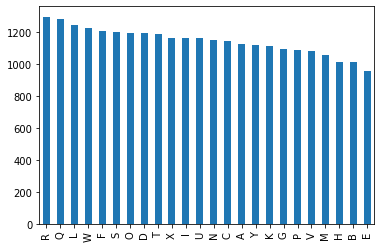

In [5]:
df['label'].value_counts().plot.bar()

In [8]:
#Sample plotting
sample = df.drop("label",axis=1).values[0]
label = df['label'].values[0]

print("Sample has a label of: ",label)

Sample has a label of:  D


In [9]:
sample.reshape(28,28).shape

(28, 28)

In [10]:
# function for plotting the images from the data

def plot_images(df,n,label):
    for i in range(n**2):
        random_value = np.random.randint(len(df[label]))
        if random_value not in [9, 25]:
            plt.subplot(n, n, i+1)
            X = df.loc[random_value].drop('label').values.astype("int").reshape(28,28)
            plt.imshow(X, cmap='binary')
            plt.title(str(df[label][random_value]),color="green", fontsize=28)
            plt.axis("off")
            plt.subplots_adjust(left=1, right=4.5, bottom=.5, top=2.5)
    plt.figure(figsize=(5,5))
    plt.show()

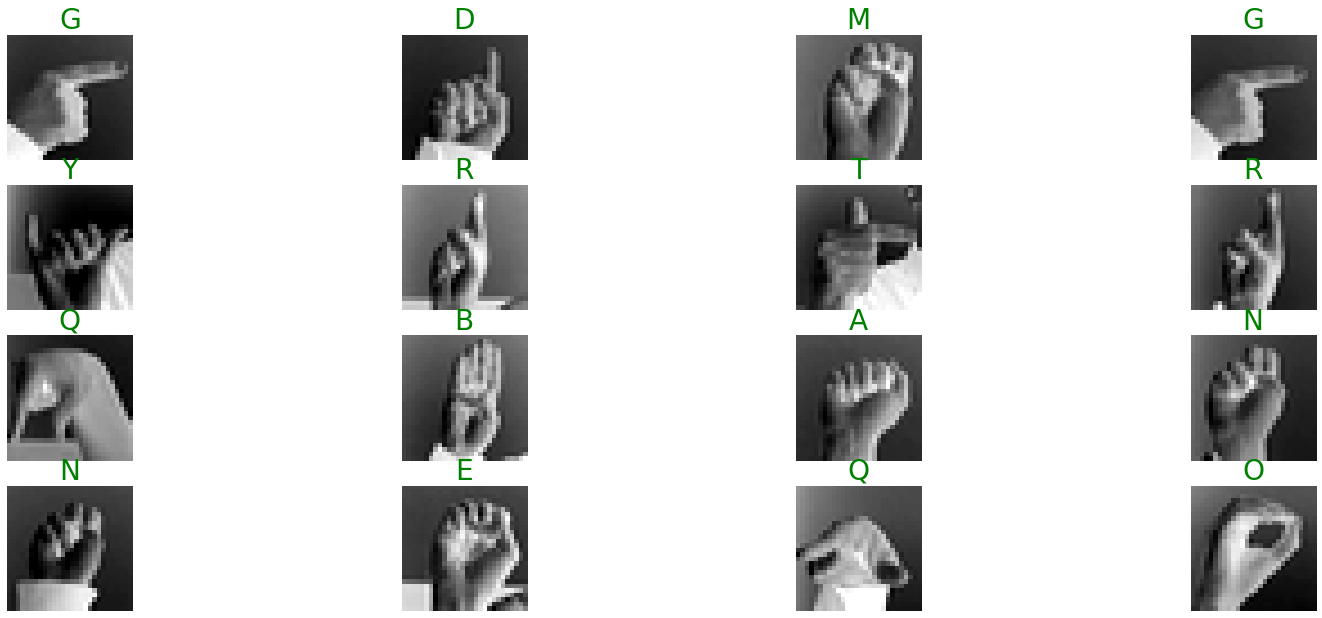

<Figure size 360x360 with 0 Axes>

In [11]:
plot_images(df,4,'label')

In [12]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,148.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,167.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,186.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [13]:
#Finding the null values
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('label',axis=1).values
y = df['label'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.25)

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
sample = X_test[0]
clf.predict([sample])

array(['I'], dtype=object)

In [19]:
y_test[0]
def plot_image(data,label):
    image =  data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.title(f"{label}")
    plt.show()

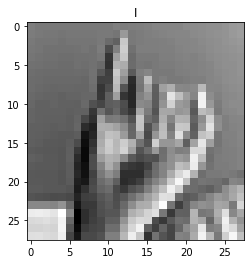

In [20]:
plot_image(sample,y_test[0])

In [ ]:
plot_image(X_test[12],y_test[12])